# Import Library

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os 
from datetime import datetime 
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.ensemble import IsolationForest

mpl.rcParams['figure.figsize']=(20,6)
mpl.rcParams['axes.grid']=False

In [ ]:
df=pd. read_csv('81250_202302_BeltCurrent.csv', engine='python', encoding='utf-8', error_bad_lines=False)
df

,floatvalue,t_stamp
0,17.992546,1675209793867
1,18.385374,1675209813868
2,18.549816,1675209833869
3,18.448912,1675209853870
4,18.515699,1675209873872
...,...,...
60483,19.219530,1677628600856
60484,19.165195,1677628640859
60485,19.222761,1677628660861
60486,19.225843,1677628680863


<AxesSubplot:>

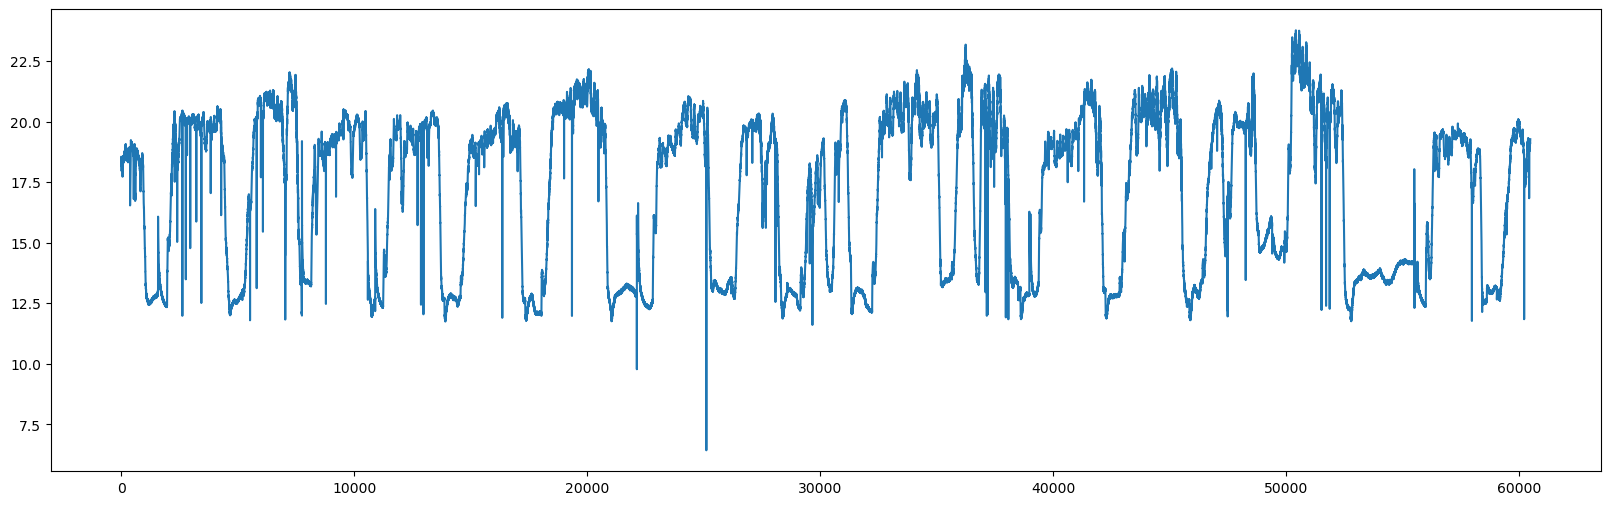

In [ ]:
df['floatvalue'].plot(figsize=(20,6))

In [ ]:
count = (df['floatvalue'] == 0).sum()
print('Count of zeros in Column floatvalue : ', count)

Count of zeros in Column floatvalue :  0


In [ ]:
count = (df['floatvalue'] == 'NaN').sum()
print('Count of NaNs in Column floatvalue : ', count)

Count of NaNs in Column floatvalue :  0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60488 entries, 0 to 60487
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   floatvalue  60488 non-null  float64
 1   t_stamp     60488 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 945.2 KB


In [ ]:
df.index.freq="MS"
df['t_stamp']= pd.to_datetime(df['t_stamp'], unit='ms') ##, unit='ms'
#df=df.iloc[3535:9200]
df.head(60)

,floatvalue,t_stamp
0,17.992546,2023-02-01 00:03:13.867
1,18.385374,2023-02-01 00:03:33.868
2,18.549816,2023-02-01 00:03:53.869
3,18.448912,2023-02-01 00:04:13.870
4,18.515699,2023-02-01 00:04:33.872
5,18.521215,2023-02-01 00:04:53.874
6,18.472090,2023-02-01 00:05:13.874
7,18.498569,2023-02-01 00:05:33.876
8,18.409054,2023-02-01 00:05:53.877
9,18.454931,2023-02-01 00:06:13.878


In [ ]:
df.drop(df.index[(df['floatvalue'] == 0)],axis=0,inplace=True)
df

,floatvalue,t_stamp
0,17.992546,2023-02-01 00:03:13.867
1,18.385374,2023-02-01 00:03:33.868
2,18.549816,2023-02-01 00:03:53.869
3,18.448912,2023-02-01 00:04:13.870
4,18.515699,2023-02-01 00:04:33.872
...,...,...
60483,19.219530,2023-02-28 23:56:40.856
60484,19.165195,2023-02-28 23:57:20.859
60485,19.222761,2023-02-28 23:57:40.861
60486,19.225843,2023-02-28 23:58:00.863


In [ ]:
df.index.freq="MS"
df['t_stamp']= pd.to_datetime(df['t_stamp'], unit='ms') ##, unit='ms'
#df=df.iloc[3535:9200]
df

,floatvalue,t_stamp
0,17.992546,2023-02-01 00:03:13.867
1,18.385374,2023-02-01 00:03:33.868
2,18.549816,2023-02-01 00:03:53.869
3,18.448912,2023-02-01 00:04:13.870
4,18.515699,2023-02-01 00:04:33.872
...,...,...
60483,19.219530,2023-02-28 23:56:40.856
60484,19.165195,2023-02-28 23:57:20.859
60485,19.222761,2023-02-28 23:57:40.861
60486,19.225843,2023-02-28 23:58:00.863
